In [2]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.shape

(891, 15)

In [6]:
#delete the row or datapoint to handle missing data

In [8]:
df.dropna().shape#this is 1 technique but this is not efficient bcs in this we miss huge number of the datapoints

(182, 15)

In [10]:
#delete column 
df.dropna(axis=1)#this will delete the null columns

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


Imputation missing values
Mean value imputation

<Axes: xlabel='age', ylabel='Count'>

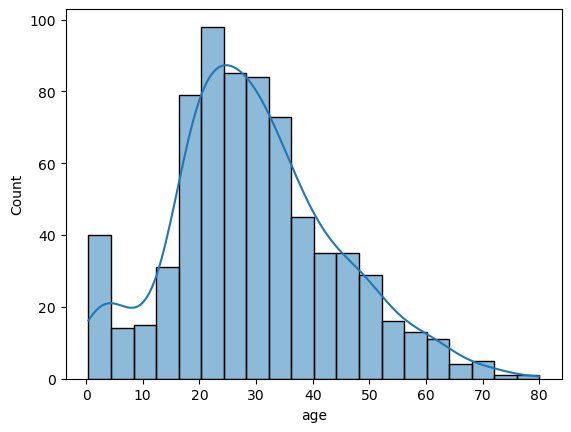

In [13]:
sns.histplot(df['age'],kde=True)

In [16]:
df['age_mean']=df['age'].fillna(df['age'].mean())
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [17]:
#mean imputation works well when we have normally distributed data .if outliers will there then we use median

2.median imputation-if we have a outliers

In [19]:
df['age_median']=df['age'].fillna(df['age'].median())
df[['age_mean','age_median','age']]

,age_mean,age_median,age
0,22.000000,22.0,22.0
1,38.000000,38.0,38.0
2,26.000000,26.0,26.0
3,35.000000,35.0,35.0
4,35.000000,35.0,35.0
...,...,...,...
886,27.000000,27.0,27.0
887,19.000000,19.0,19.0
888,29.699118,28.0,NaN
889,26.000000,26.0,26.0


Mode imputation-categorical values

In [20]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [22]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
mode_val=df[df['embarked'].notna()]['embarked'].mode()[0]#frequently occured value replaced with null value
df['embarked_mode']=df['embarked'].fillna(mode_val)
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


# Handling imbalance data
-upsampling
-downsampling

In [30]:
import numpy as np
import pandas as pd

np.random.seed(123)

n=1000
class_0_ratio=0.9
n_class_0 = int(n*class_0_ratio)
n_class_1 = n-n_class_0

In [31]:
n_class_0

900

In [33]:
n_class_1

100

In [37]:
#CREATE MY DATAFRAME WITH IMBALANCED DATASET

class_0 =pd.DataFrame({

    'feature_1': np.random.normal(loc= 0, scale= 1, size= n_class_0),

    'feature_2': np.random.normal(loc =0, scale =1, size= n_class_0),

    'target': [0]* n_class_0
})

class_1 =pd.DataFrame({

    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),

    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),

    'target': [1]* n_class_1
})
class_1

,feature_1,feature_2,target
0,-0.643425,2.571923,1
1,1.551009,1.782767,1
2,1.641093,2.054318,1
3,2.133194,2.155998,1
4,1.355758,2.467810,1
...,...,...,...
95,2.677156,1.092048,1
96,2.963404,0.181955,1
97,1.621476,1.877267,1
98,3.429559,3.794486,1


In [40]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [41]:
df.tail()

,feature_1,feature_2,target
995,2.677156,1.092048,1
996,2.963404,0.181955,1
997,1.621476,1.877267,1
998,3.429559,3.794486,1
999,3.532273,1.679490,1


In [42]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [43]:
#upsampling-- here we increase the minority data points

In [44]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [46]:
from sklearn.utils import resample

df_minority_upsampled =resample(df_minority, replace =True, #Sample With replacement

    n_samples =len(df_majority),

    random_state=42
)
df_minority_upsampled.shape

(900, 3)

In [48]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,2.905343,1.495151,1
992,2.000977,1.814833,1
914,1.927957,2.280911,1
971,2.819483,2.964646,1
960,2.456515,1.833528,1


In [53]:
df_upsample = pd.concat([df_majority,df_minority_upsampled])

In [54]:
df_upsample['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

# DownSampling

In [56]:
#CREATE MY DATAFRAME WITH IMBALANCED DATASET

class_0 =pd.DataFrame({

    'feature_1': np.random.normal(loc= 0, scale= 1, size= n_class_0),

    'feature_2': np.random.normal(loc =0, scale =1, size= n_class_0),

    'target': [0]* n_class_0
})

class_1 =pd.DataFrame({

    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),

    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),

    'target': [1]* n_class_1
})
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [57]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [58]:
from sklearn.utils import resample

df_minority_downsampled =resample(df_majority, replace =False,

    n_samples =len(df_minority),

    random_state=42
)
df_minority_downsampled.shape

(100, 3)

In [59]:
df_downsample = pd.concat([df_minority,df_minority_downsampled])

In [61]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

In [62]:
#upsampling is preferable rather than downsampling becs we loosing a datapoint

# SMOTE
-Synthetic Minority Oversampling Technique

In [8]:
from sklearn.datasets import make_classification 
import pandas as pd

In [9]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [14]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


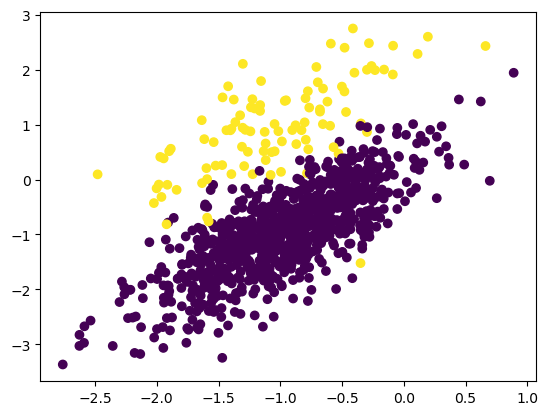

In [19]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [20]:
!pip install imblearn

In [24]:
final_df['target'].shape

(1000,)

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])
X.shape

(1800, 2)

In [27]:
y.shape

(1800,)

In [29]:
len(y[y==0])

900

In [30]:
len(y[y==1])

900

In [31]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversampled=pd.concat([df1,df2],axis=1)

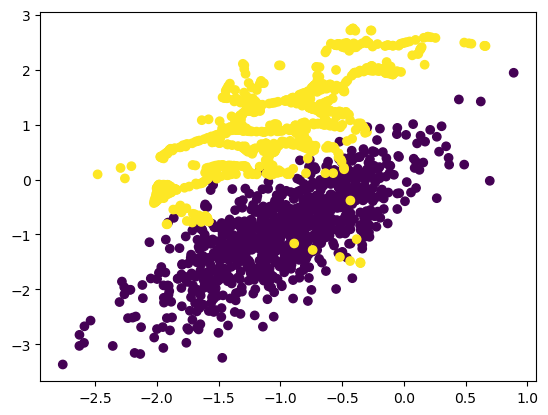

In [32]:
plt.scatter(oversampled['f1'],oversampled['f2'],c=oversampled['target'])

# 5 Number Summery and box plot

In [36]:
import numpy as np

In [38]:
marks = [23,45,67,89,99,88,77,67,65,54,43,23,43,56,89,23,67,89]
minimum,Q1,median,Q3,maximum=np.quantile(marks,[0,0.25,0.5,0.75,1.0])

In [40]:
minimum,Q1,median,Q3,maximum

(23.0, 43.5, 66.0, 85.25, 99.0)

In [41]:
IQR = Q3-Q1
IQR

41.75

In [42]:
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [43]:
lower_fence

-19.125

In [44]:
upper_fence

147.875

In [45]:
marks = [23,45,67,89,99,88,77,67,65,54,43,23,43,56,89,23,67,89]

In [46]:
import seaborn as sns

<Axes: >

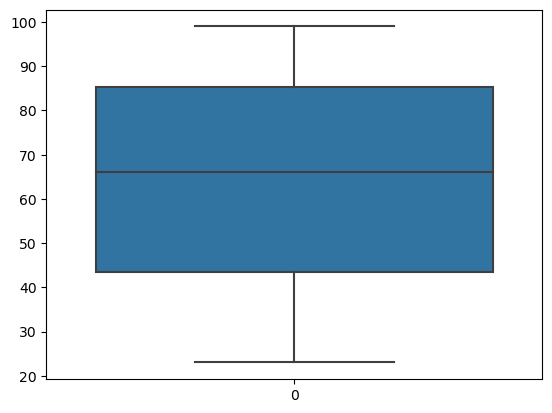

In [47]:
sns.boxplot(marks)

In [48]:
marks = [23,45,67,89,99,88,77,67,65,54,43,23,43,56,89,23,67,89,200,300]

<Axes: >

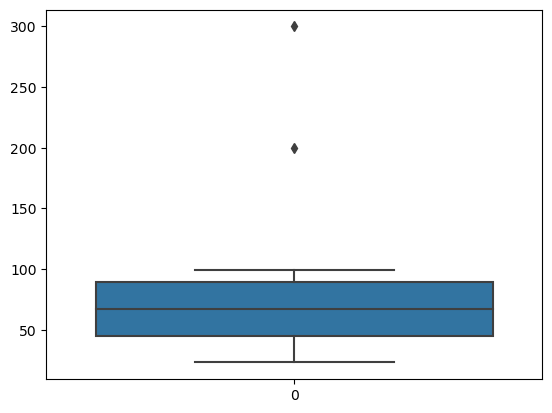

In [49]:
sns.boxplot(marks)

# Data Encoding
-One HotEncoding

Red[1,0,0]
Green[0,1,0]
Blue[0,0,1]

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [4]:
#create an instance for OneHotEncoder
encoder = OneHotEncoder()

In [9]:
#do fit and trasform
encoded=encoder.fit_transform(df[['color']]).toarray()
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [12]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [14]:
pd.concat([df,encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [19]:
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df1=df.drop(df[['total_bill','tip','size']],axis=1)
df1

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [25]:
#create an instance for OneHotEncoder
encoder = OneHotEncoder()

In [26]:
#do fit and trasform
encoded=encoder.fit_transform(df1[['sex','smoker','day','time']]).toarray()
encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [29]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoded_df

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
pd.concat([df1,encoded_df],axis=1)

,sex,smoker,day,time,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,Female,No,Sun,Dinner,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Male,No,Sun,Dinner,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Male,No,Sun,Dinner,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Male,No,Sun,Dinner,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Female,No,Sun,Dinner,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Male,No,Sat,Dinner,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,Female,Yes,Sat,Dinner,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,Male,Yes,Sat,Dinner,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,Male,No,Sat,Dinner,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Label encoding
-red:3
-green:2
-blue:1

In [31]:
df = pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
lbl_encoder=LabelEncoder()

In [35]:
lbl_encoder.fit_transform(df[['color']])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

if the data is having same data then assighned value is same for two data it should not happen so we go for ordinal encoding

# ordinal encoding

In [36]:
df = pd.DataFrame({
    'size':['small','medium','large','medium','small','large']
})
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [38]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
ord_encoder = OrdinalEncoder(categories=[['small','medium','large']])
ord_encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

# Target guided ordinal encoding

In [41]:
import pandas as pd

In [42]:
df = pd.DataFrame({
    'city':['new york','london','paris','tokyo','new york','paris'],
    'price':[200,150,300,250,180,220]
})
df

,city,price
0,new york,200
1,london,150
2,paris,300
3,tokyo,250
4,new york,180
5,paris,220


In [45]:
mean_price = df.groupby('city')['price'].mean().to_dict()#if the two or more value is same then mean is taken
mean_price

{'london': 150.0, 'new york': 190.0, 'paris': 260.0, 'tokyo': 250.0}

In [46]:
df['encoded_df']=df['city'].map(mean_price)
df

,city,price,encoded_df
0,new york,200,190.0
1,london,150,150.0
2,paris,300,260.0
3,tokyo,250,250.0
4,new york,180,190.0
5,paris,220,260.0


In [47]:
df[['price','encoded_df']]#this data is given to model

,price,encoded_df
0,200,190.0
1,150,150.0
2,300,260.0
3,250,250.0
4,180,190.0
5,220,260.0
